# PCA - Tarefa 01: *HAR* com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

filename_features ="C:/Users/Arthur/Desktop/EBAC/Curso 3 - Cientista de Dados/Módulo 27 - PCA/UCI HAR Dataset/features.txt"
filename_labels = "C:/Users/Arthur/Desktop/EBAC/Curso 3 - Cientista de Dados/Módulo 27 - PCA/UCI HAR Dataset/activity_labels.txt"

filename_subtrain = "C:/Users/Arthur/Desktop/EBAC/Curso 3 - Cientista de Dados/Módulo 27 - PCA/UCI HAR Dataset/subject_train.txt"
filename_xtrain = "C:/Users/Arthur/Desktop/EBAC/Curso 3 - Cientista de Dados/Módulo 27 - PCA/UCI HAR Dataset/X_train.txt"
filename_ytrain = "C:/Users/Arthur/Desktop/EBAC/Curso 3 - Cientista de Dados/Módulo 27 - PCA/UCI HAR Dataset/y_train.txt"

filename_subtest = "C:/Users/Arthur/Desktop/EBAC/Curso 3 - Cientista de Dados/Módulo 27 - PCA/UCI HAR Dataset/subject_test.txt"
ffilename_xtest = "C:/Users/Arthur/Desktop/EBAC/Curso 3 - Cientista de Dados/Módulo 27 - PCA/UCI HAR Dataset/X_test.txt"
filename_ytest = "C:/Users/Arthur/Desktop/EBAC/Curso 3 - Cientista de Dados/Módulo 27 - PCA/UCI HAR Dataset/y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

C:\Users\Arthur\AppData\Local\Temp\ipykernel_9420\2239233069.py:27: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
C:\Users\Arthur\AppData\Local\Temp\ipykernel_9420\2239233069.py:30: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
C:\Users\Arthur\AppData\Local\Temp\ipykernel_9420\2239233069.py:34: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)


## Árvore de decisão

Rode uma árvore de decisão com todas as variáveis, utilizando o ```ccp_alpha=0.001```. Avalie a acurácia nas bases de treinamento e teste. Avalie o tempo de processamento.

In [2]:
%%time
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

Wall time: 44.1 ms


In [3]:
%%time

clf = DecisionTreeClassifier(random_state=1234).fit(X_train, y_train)
caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

ccp_alphas = [0.001]

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    clfs.append(clf)

Wall time: 13.2 s


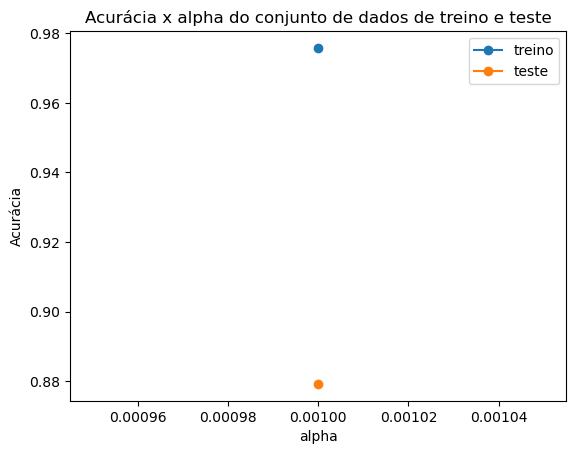

Wall time: 343 ms


In [4]:
%%time
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste", drawstyle="steps-post")
ax.legend()
plt.show()

In [5]:
%%time
ind_melhor_arvore = len(train_scores) - train_scores[::-1].index(max(train_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

acc_train = train_scores[ind_melhor_arvore]
acc_teste = melhor_arvore.score(X_test, y_test)

print(f'Acurácia da melhor árvore na base de treino:    {acc_train*100:.1f}')
print(f'Acurácia da melhor árvore na base de teste:     {acc_teste*100:.1f}')

Acurácia da melhor árvore na base de treino:    97.6
Acurácia da melhor árvore na base de teste:     87.9
Wall time: 17.6 ms


## Árvore com PCA

Faça uma análise de componemtes principais das variáveis originais. Utilize apenas uma componente. Faça uma árvore de decisão com esta componente como variável explicativa.

- Avalie a acurácia nas bases de treinamento e teste
- Avalie o tempo de processamento

In [6]:
%%time
prcomp = PCA(n_components=1).fit(X_train)

pc_treino = prcomp.transform(X_train)
pc_teste  = prcomp.transform(X_test)

pc_treino.shape

Wall time: 220 ms


(5514, 1)

In [7]:
%%time

clf = DecisionTreeClassifier(random_state=1234).fit(X_train, y_train)
caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    clfs.append(clf)

Wall time: 4min 42s


In [8]:
%%time
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

Wall time: 2.72 s


In [9]:
%%time
ind_melhor_arvore = len(train_scores) - train_scores[::-1].index(max(train_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

acc_train = train_scores[ind_melhor_arvore]
acc_teste = melhor_arvore.score(X_test, y_test)

print(f'Acurácia da melhor árvore na base de treino:    {acc_train*100:.1f}')
print(f'Acurácia da melhor árvore na base de teste:     {acc_teste*100:.1f}')

Acurácia da melhor árvore na base de treino:    100.0
Acurácia da melhor árvore na base de teste:     93.1
Wall time: 23.8 ms


## Testando o número de componentes

Com base no código acima, teste a árvore de classificação com pelo menos as seguintes possibilidades de quantidades de componentes: ```[1, 2, 5, 10, 50]```. Avalie para cada uma delas:

- Acurácia nas bases de treino e teste
- Tempo de processamento


Testando com 2 componentes:

In [12]:
%%time

#2 componentes
prcomp = PCA(n_components=2).fit(X_train)

pc_treino = prcomp.transform(X_train)
pc_teste  = prcomp.transform(X_test)

pc_treino.shape

Wall time: 150 ms


(5514, 2)

In [13]:
%%time

clf = DecisionTreeClassifier(random_state=1234).fit(X_train, y_train)
caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    clfs.append(clf)

Wall time: 3min 23s


In [14]:
%%time
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

Wall time: 1.37 s


In [15]:
%%time
ind_melhor_arvore = len(train_scores) - train_scores[::-1].index(max(train_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

acc_train = train_scores[ind_melhor_arvore]
acc_teste = melhor_arvore.score(X_test, y_test)

print(f'Acurácia da melhor árvore na base de treino:    {acc_train*100:.1f}')
print(f'Acurácia da melhor árvore na base de teste:     {acc_teste*100:.1f}')

Acurácia da melhor árvore na base de treino:    100.0
Acurácia da melhor árvore na base de teste:     93.1
Wall time: 21.3 ms


Testando com 5 componentes:

In [6]:
%%time

#5 componentes
prcomp = PCA(n_components=5).fit(X_train)

pc_treino = prcomp.transform(X_train)
pc_teste  = prcomp.transform(X_test)

pc_treino.shape

Wall time: 301 ms


(7352, 5)

In [7]:
%%time

clf = DecisionTreeClassifier(random_state=1234).fit(X_train, y_train)
caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    clfs.append(clf)

Wall time: 5min 29s


In [8]:
%%time
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

Wall time: 2.04 s


In [9]:
%%time
ind_melhor_arvore = len(train_scores) - train_scores[::-1].index(max(train_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

acc_train = train_scores[ind_melhor_arvore]
acc_teste = melhor_arvore.score(X_test, y_test)

print(f'Acurácia da melhor árvore na base de treino:    {acc_train*100:.1f}')
print(f'Acurácia da melhor árvore na base de teste:     {acc_teste*100:.1f}')

Acurácia da melhor árvore na base de treino:    100.0
Acurácia da melhor árvore na base de teste:     85.5
Wall time: 21.8 ms


Testando com 10 componentes:

In [10]:
%%time

#10 componentes
prcomp = PCA(n_components=10).fit(X_train)

pc_treino = prcomp.transform(X_train)
pc_teste  = prcomp.transform(X_test)

pc_treino.shape

Wall time: 274 ms


(7352, 10)

In [11]:
%%time

clf = DecisionTreeClassifier(random_state=1234).fit(X_train, y_train)
caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    clfs.append(clf)

Wall time: 5min 23s


In [12]:
%%time
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

Wall time: 1.98 s


In [13]:
%%time
ind_melhor_arvore = len(train_scores) - train_scores[::-1].index(max(train_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

acc_train = train_scores[ind_melhor_arvore]
acc_teste = melhor_arvore.score(X_test, y_test)

print(f'Acurácia da melhor árvore na base de treino:    {acc_train*100:.1f}')
print(f'Acurácia da melhor árvore na base de teste:     {acc_teste*100:.1f}')

Acurácia da melhor árvore na base de treino:    100.0
Acurácia da melhor árvore na base de teste:     85.5
Wall time: 24.1 ms


Testando com 50 componentes:

In [14]:
%%time

#50 componentes
prcomp = PCA(n_components=50).fit(X_train)

pc_treino = prcomp.transform(X_train)
pc_teste  = prcomp.transform(X_test)

pc_treino.shape

Wall time: 415 ms


(7352, 50)

In [15]:
%%time

clf = DecisionTreeClassifier(random_state=1234).fit(X_train, y_train)
caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    clfs.append(clf)

Wall time: 5min 28s


In [16]:
%%time
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

Wall time: 2.45 s


In [17]:
%%time
ind_melhor_arvore = len(train_scores) - train_scores[::-1].index(max(train_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

acc_train = train_scores[ind_melhor_arvore]
acc_teste = melhor_arvore.score(X_test, y_test)

print(f'Acurácia da melhor árvore na base de treino:    {acc_train*100:.1f}')
print(f'Acurácia da melhor árvore na base de teste:     {acc_teste*100:.1f}')

Acurácia da melhor árvore na base de treino:    100.0
Acurácia da melhor árvore na base de teste:     85.5
Wall time: 16 ms
